# 중간고사

## ML 분류 RF, LR, DT 사용

### 
2. 해당 소스를 이용하여 ML 분류 RF, LR, DT

3. 해당 소스를 이용하여 FCNN

4. 해당 소스를 이용하여 CNN

5. 모든 소스에는 F1값 및 confusion matrix 표시

In [2]:
# 사용 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from tensorflow.keras import layers

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data")
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

print(df.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    med  unacc
1  vhigh  vhigh     2       2    small   high  unacc
2  vhigh  vhigh     2       2      med    low  unacc
3  vhigh  vhigh     2       2      med    med  unacc
4  vhigh  vhigh     2       2      med   high  unacc


In [5]:
# 결측치 확인
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [6]:
# 결측치 제거
df = df.dropna()

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 2. 범주형 변수 'Sex'를 숫자로 변환 (Label Encoding)
label_encoder = LabelEncoder()

df['buying'] = label_encoder.fit_transform(df['buying'])

df['maint'] = label_encoder.fit_transform(df['maint'])

df['lug_boot'] = label_encoder.fit_transform(df['lug_boot'])

df['safety'] = label_encoder.fit_transform(df['safety'])

df['class'] = label_encoder.fit_transform(df['class'])

df['doors'] = label_encoder.fit_transform(df['doors'])

df['persons'] = label_encoder.fit_transform(df['persons'])

# 3. 상관 관계를 계산할 열들 선택
df_corr = df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']]

array([[<Axes: title={'center': 'buying'}>,
        <Axes: title={'center': 'maint'}>,
        <Axes: title={'center': 'doors'}>],
       [<Axes: title={'center': 'persons'}>,
        <Axes: title={'center': 'lug_boot'}>,
        <Axes: title={'center': 'safety'}>],
       [<Axes: title={'center': 'class'}>, <Axes: >, <Axes: >]],
      dtype=object)

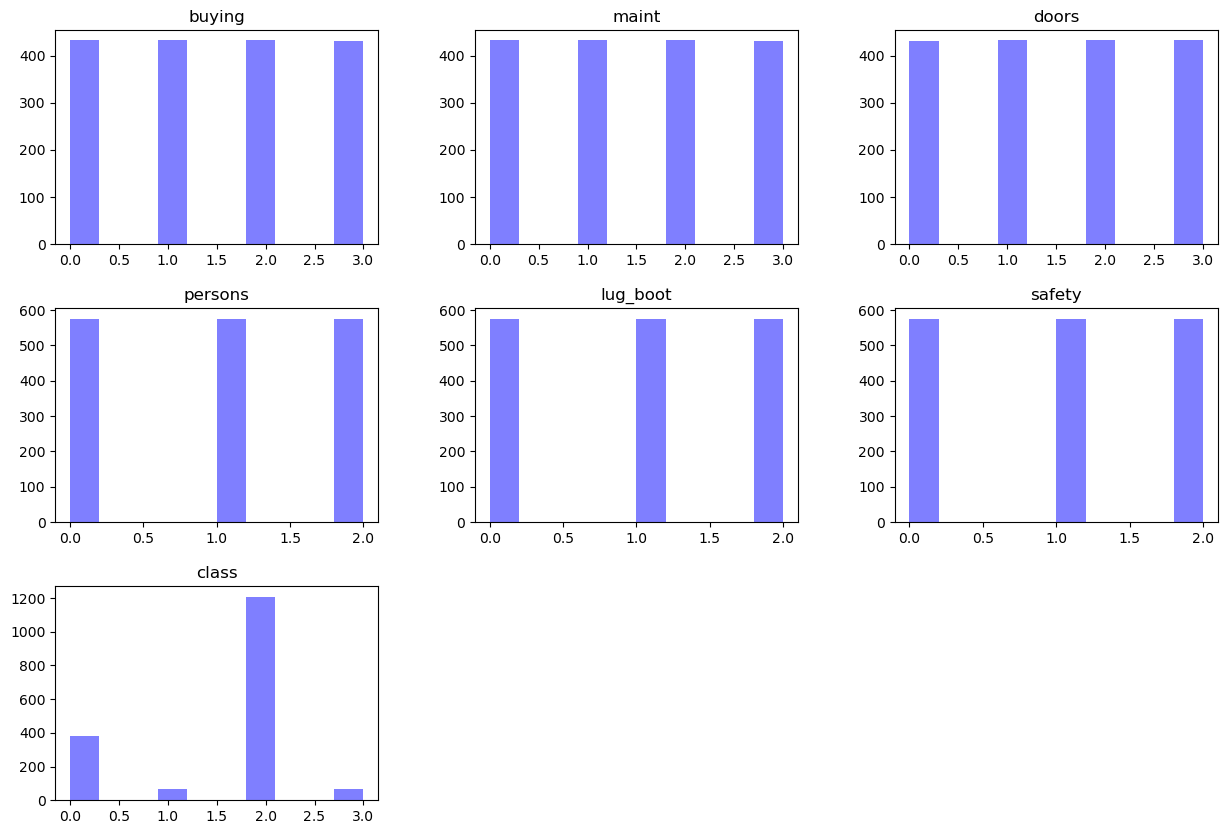

In [8]:
df.hist(figsize=(15, 10), grid=False, alpha=0.5, color='blue')

Text(0.5, 1.0, 'archive of class')

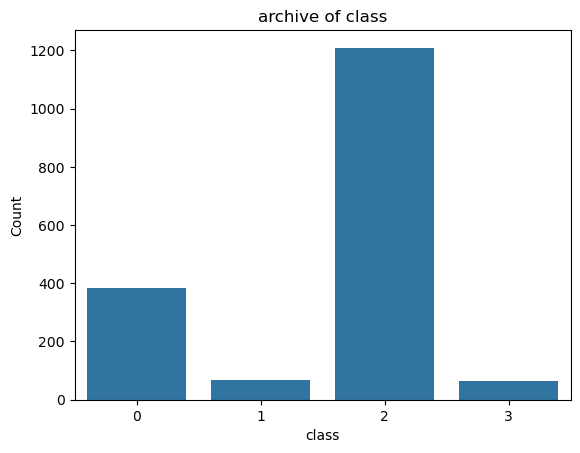

In [9]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x = "class")
plt.xlabel("class")
plt.ylabel("Count")
plt.title("archive of class")

In [10]:
df['class'].value_counts()

class
2    1209
0     384
1      69
3      65
Name: count, dtype: int64

In [11]:
# Train Test Split

In [12]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [13]:
X = df.drop('class', axis = 1)
y = df['class']

In [14]:
#one hot encoding 하기

y = pd.get_dummies(y).values
y

array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False, False,  True]])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

X_train

,buying,maint,doors,persons,lug_boot,safety
1485,1,0,3,0,2,2
665,0,2,0,2,2,1
1225,2,1,1,1,2,0
1709,1,1,3,1,2,1
1033,2,0,2,0,0,0
...,...,...,...,...,...,...
1666,1,1,1,2,2,0
1265,2,1,2,2,0,1
1277,2,1,3,1,2,1
1414,1,0,0,1,2,0


In [16]:
y_test.shape

(432, 4)

In [17]:
# Define the input layer
inputs = Input(shape=(X_train.shape[1],))

# Define the model architecture
x = Dense(128, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x) 

# Create the model
model = Model(inputs=inputs, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,412 (36.77 KB)

 Trainable params: 9,412 (36.77 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model_history=model.fit(x=X_train, y=y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1) # 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6811 - loss: 0.9325 - val_accuracy: 0.7292 - val_loss: 0.7481
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.6853 - loss: 0.7508 - val_accuracy: 0.7222 - val_loss: 0.6793
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.7119 - loss: 0.6477 - val_accuracy: 0.7245 - val_loss: 0.6403
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.7164 - loss: 0.6243 - val_accuracy: 0.7407 - val_loss: 0.6073
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.7143 - loss: 0.5928 - val_accuracy: 0.7662 - val_loss: 0.5525
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.7572 - loss: 0.5491 - val_accuracy: 0.8102 - val_loss: 0.4989
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.7917 - loss: 0.4928 - val_accuracy: 0.8218 - val_loss: 0.4395
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.8400 - loss: 0.4082 - val_accuracy: 0.81

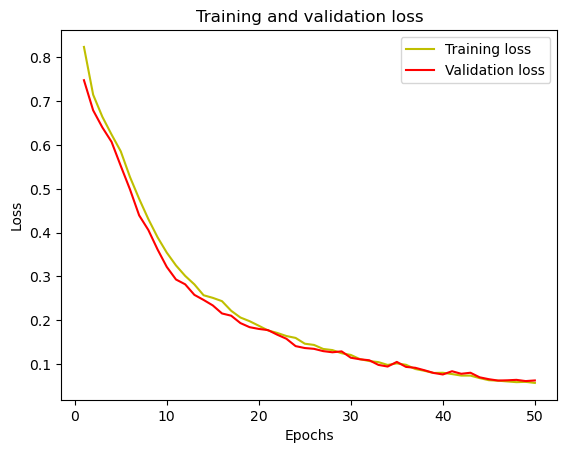

In [19]:

import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

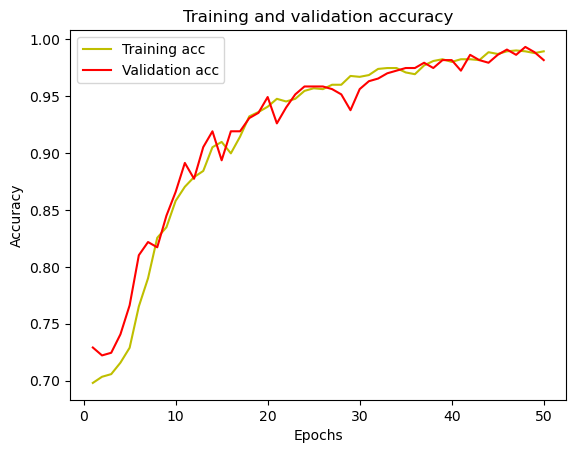

In [20]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [21]:
#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        95
           1       0.92      0.80      0.86        15
           2       1.00      0.99      0.99       302
           3       1.00      1.00      1.00        20

    accuracy                           0.98       432
   macro avg       0.96      0.94      0.95       432
weighted avg       0.98      0.98      0.98       432

[[ 94   1   0   0]
 [  3  12   0   0]
 [  4   0 298   0]
 [  0   0   0  20]]
